In [19]:
#here we are importing the data set
import numpy as np
import pandas as pd
dataset = pd.read_csv("Final_data.csv")
print(np.shape(dataset))
dataset.head()

(7525, 26)


,Maths,Physics,Biology,Chemistry,English,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,...,Subject_12,Subject_13,Subject_14,Subject_15,Subject_16,Subject_17,Subject_18,Subject_19,Subject_20,course
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Btech(bachelor of technology)
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,BPharma
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,Graphics and Animation
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Btech(bachelor of technology)
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Btech(Data Science)


In [20]:
data = dataset.iloc[:49,:-1].values
label = dataset.iloc[:49,-1]
#here we are labeling the data as we will be using Supervised learning model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df = dataset
label = df.iloc[:49,-1]
original=label.unique()
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["Course"])
numeric=y["Course"].unique()
y1 = pd.DataFrame({'Course':original, 'Associated Number':numeric})
print(y1)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label)
y=pd.DataFrame(label,columns=["course"])
X = pd.DataFrame(data,columns=['Maths','Physics','Chemistry','English','Biology','Subject_1',
                                'Subject_2','Subject_3','Subject_4','Subject_5','Subject_6',
                                'Subject_7','Subject_8','Subject_9','Subject_10','Subject_11','Subject_12',
                                'Subject_13','Subject_14','Subject_15','Subject_16','Subject_17','Subject_18','Subject_19','Subject_20'])

                                   Course  Associated Number
0           Btech(bachelor of technology)                  7
1                                 BPharma                  2
2                  Graphics and Animation                  8
3                     Btech(Data Science)                  6
4                       Bachelors in Arts                  4
5  BCA(Bachelors in Computer Application)                  1
6               Bachelors in Architecture                  3
7                                     BBA                  0
8                             Bsc Nursing                  5


In [3]:

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 2.127362
Feature 1: 1.056266
Feature 2: 2.140972
Feature 3: 1.812667
Feature 4: 3.316358
Feature 5: 1.125758
Feature 6: 1.299609
Feature 7: 6.263469
Feature 8: 1.013542
Feature 9: 1.645536
Feature 10: 6.433067
Feature 11: 3.760686
Feature 12: 0.661667
Feature 13: 1.680994
Feature 14: 0.907095
Feature 15: 4.838542
Feature 16: 1.000189
Feature 17: 2.781894
Feature 18: 2.887449
Feature 19: 4.180476
Feature 20: 3.148494
Feature 21: 0.540348
Feature 22: 0.451277
Feature 23: 0.139951
Feature 24: 6.099864


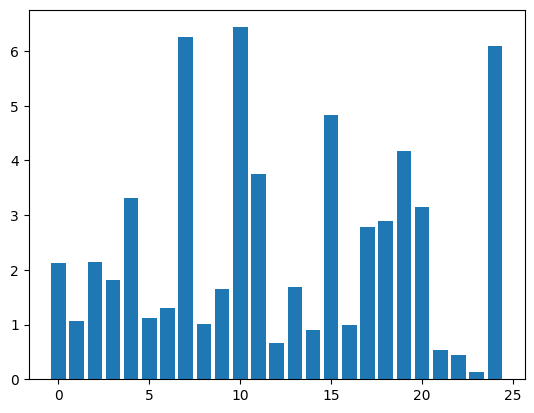

 The number of important features with threshold as 1 :20 
Feature 0: 2.699185
Feature 1: 0.659605
Feature 2: 1.580749
Feature 3: 3.900000
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.575610
Feature 8: 1.716049
Feature 9: 1.442778
Feature 10: 3.688753
Feature 11: 2.449367
Feature 12: 1.653040
Feature 13: 2.094059
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.421764
Feature 18: 3.588060
Feature 19: 4.174691
Feature 20: 1.730137
Feature 21: 0.884336
Feature 22: 0.515833
Feature 23: 0.546987
Feature 24: 8.049349


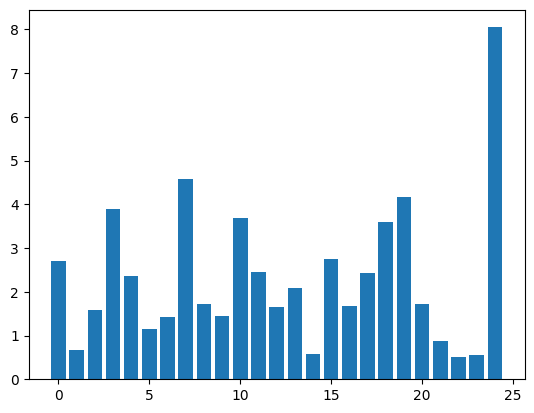

 The number of important features with threshold as 1 :20 


In [4]:
#
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))

pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

count = 0
for i in fs1.scores_ :
    if i > 1 :
        count = count + 1
k1=count
print(" The number of important features with threshold as 1 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ :
    if i > 1 :
        count = count + 1
k3=count

print(" The number of important features with threshold as 1 :{} ".format(k3))

Feature 0: 2.699185
Feature 1: 0.659605
Feature 2: 1.580749
Feature 3: 3.900000
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.575610
Feature 8: 1.716049
Feature 9: 1.442778
Feature 10: 3.688753
Feature 11: 2.449367
Feature 12: 1.653040
Feature 13: 2.094059
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.421764
Feature 18: 3.588060
Feature 19: 4.174691
Feature 20: 1.730137
Feature 21: 0.884336
Feature 22: 0.515833
Feature 23: 0.546987
Feature 24: 8.049349


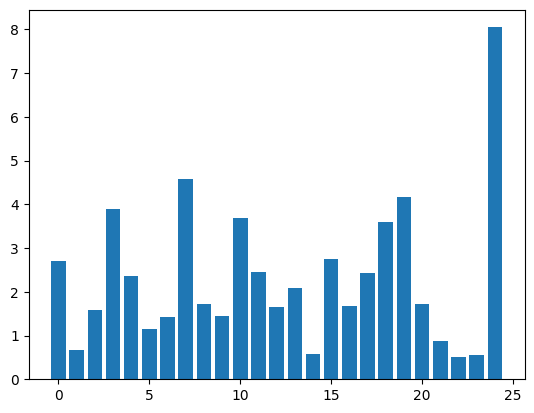

 The number of important features with threshold as 1 : 20


In [5]:

for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))

pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ :
    if i > 1 :
        count = count + 1
k5=count

print(" The number of important features with threshold as 1 : {}" .format(k5))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 0.090969
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.478213
Feature 5: 0.258523
Feature 6: 0.057459
Feature 7: 0.210592
Feature 8: 0.000000
Feature 9: 0.101275
Feature 10: 0.376188
Feature 11: 0.154388
Feature 12: 0.206284
Feature 13: 0.000000
Feature 14: 0.594899
Feature 15: 0.232988
Feature 16: 0.713015
Feature 17: 0.011274
Feature 18: 0.000000
Feature 19: 0.015628
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.392077
Feature 23: 0.000000
Feature 24: 0.015434


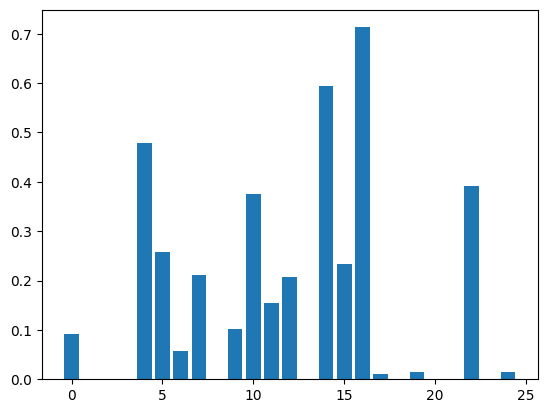

 The number of important features with threshold as 0.2 :9 
Feature 0: 0.080574
Feature 1: 0.000000
Feature 2: 0.096831
Feature 3: 0.012427
Feature 4: 0.542466
Feature 5: 1.036487
Feature 6: 0.623285
Feature 7: 0.000000
Feature 8: 0.009195
Feature 9: 0.220314
Feature 10: 0.695245
Feature 11: 0.135015
Feature 12: 0.674374
Feature 13: 0.244849
Feature 14: 2.000759
Feature 15: 0.176270
Feature 16: 1.656292
Feature 17: 0.585930
Feature 18: 0.326538
Feature 19: 0.135979
Feature 20: 0.087258
Feature 21: 0.000000
Feature 22: 0.708363
Feature 23: 0.544282
Feature 24: 0.152451


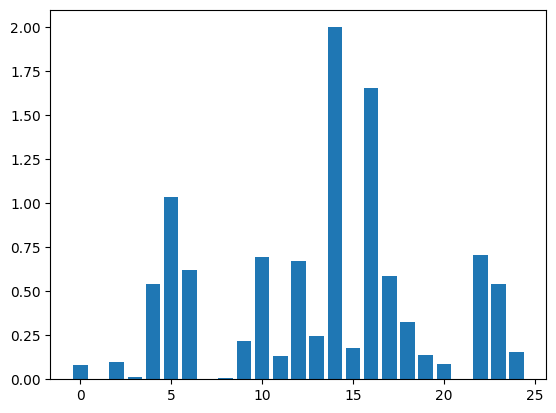

 The number of important features with threshold as 0.2 :13 
Feature 0: 0.078178
Feature 1: 0.000000
Feature 2: 0.246314
Feature 3: 0.000000
Feature 4: 0.514281
Feature 5: 0.900467
Feature 6: 0.207159
Feature 7: 0.221413
Feature 8: 0.354891
Feature 9: 0.171692
Feature 10: 0.366628
Feature 11: 0.031747
Feature 12: 0.131648
Feature 13: 0.343777
Feature 14: 1.554738
Feature 15: 0.069318
Feature 16: 1.396040
Feature 17: 0.072235
Feature 18: 0.262971
Feature 19: 0.135627
Feature 20: 0.242060
Feature 21: 0.092205
Feature 22: 0.808752
Feature 23: 0.459345
Feature 24: 0.187070


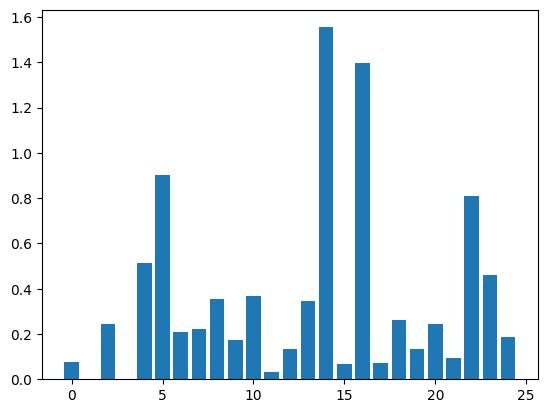

 The number of important features with threshold as 0.2 : 14


In [8]:
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))
pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

count = 0
for i in fs1.scores_ :
    if i > 0.2 :
        count = count + 1
k1=count
print(" The number of important features with threshold as 0.2 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ :
    if i > 0.2 :
        count = count + 1
k3=count

print(" The number of important features with threshold as 0.2 :{} ".format(k3))

for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))

pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ :
    if i > 0.2 :
        count = count + 1
k5=count

print(" The number of important features with threshold as 0.2 : {}" .format(k5))

In [10]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)


#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

#-------------XGBoost-----------------#
print("Boosting the Decision Tree  ")
acc = xgboost(X_train2,y_train2,X_test2,y_test2,clf)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 20.0
With feature Selection : 
Model accuracy score with Decision Tree 40.0
 
Boosting the Decision Tree  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy= 93.33333333333333


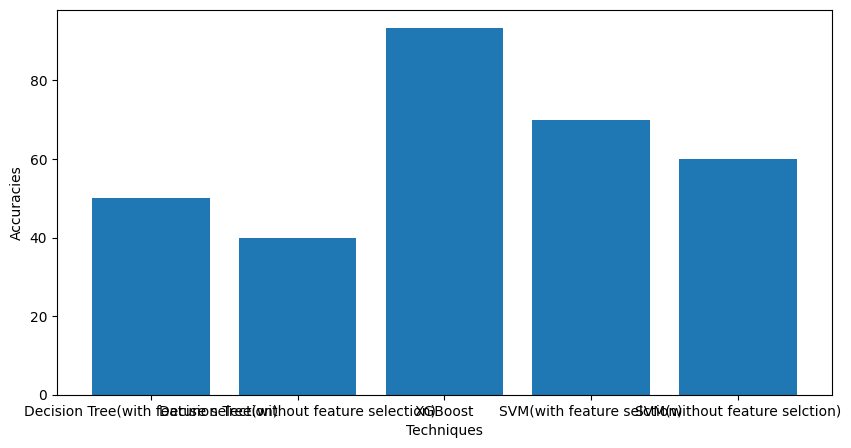

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 5))
Name = ['Decision Tree(with feature selection)','Decision Tree(without feature selection)', 'XGBoost', 'SVM(with feature selction)','SVM(without feature selction)']
accuracies = [50,40,93.333,70,60]
plt.bar(Name,accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Techniques')
plt.show()

In [ ]:
# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(X.columns)
for i in feat:
  print(i)
  val = input("Enter: ")
  x_new.append(val)
x_new

Maths
Enter: 3
Physics
Enter: 5
Chemistry
Enter: 4
English
Enter: 3
Biology
Enter: 5
no_of_projects
Enter: 4
coresub_skill
Enter: 3
aptitude_skill
Enter: 5
problemsolving_skill
Enter: 2
programming_skill
Enter: 2
abstractthink_skill
Enter: 5
design_skill
Enter: 2
business_mind
Enter: 5
first_program
Enter: 4
lab_programs
Enter: 2
ds_coding
Enter: 5
technology_used
Enter: 3
sympos_attend
Enter: 2
sympos_won
Enter: 5
extracurricular
Enter: 5
learning_style
Enter: 4
school_bench
Enter: 2
school_teachers_know
Enter: 3
school_performence
Enter: 4
extra_skills
Enter: 2


['3',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '5',
 '2',
 '2',
 '5',
 '2',
 '5',
 '4',
 '2',
 '5',
 '3',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4',
 '2']

In [17]:
x_new = ['3','5','4','3','5','4','3','5','2','2','5','4','5','4','2','5','5','3','2','2','5','4','2','3','4']
new_pred  = clf.predict([x_new])
print("Prediction : {}".format(y1[y1['Associated Number']==new_pred[0]]['Course']))

Prediction : 4    Bachelors in Arts
Name: Course, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
#Support Vector machine
from sklearn.metrics import confusion_matrix,accuracy_score
def svm(X_train,y_train,X_test,y_test):
  from sklearn.svm import SVC
  from pandas import read_csv
  from sklearn.model_selection import train_test_split

  from sklearn.metrics import accuracy_score
  svc=SVC()
  svc.fit(X_train,y_train)
  y_pred=svc.predict(X_test)
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
  return accuracy_score(y_test, y_pred)*100

def Dec_tree(X_train,y_train,X_test,y_test):
  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_test_arr=y_test['course']
  from sklearn.metrics import confusion_matrix,accuracy_score
  accuracy = accuracy_score(y_test,y_pred)
  print('Model accuracy score with Decision Tree', accuracy_score(y_test, y_pred)*100)
  return accuracy*100,clf

def xgboost(X_train,y_train,X_test,y_test,clf):
  shape = X_train.shape
  X_train=pd.to_numeric(X_train.values.flatten())
  X_train=X_train.reshape(shape)
  from xgboost.sklearn import XGBClassifier
  model = XGBClassifier()
  model.fit(X_train, y_train)
  xgb_y_pred  = clf.predict(X_test)
  xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
  print("accuracy=",xgb_accuracy*100)
  return xgb_accuracy*100